In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,3,10600.5483
1334,18,1,31.92,0,1,2,2205.9808
1335,18,1,36.85,0,1,0,1629.8335
1336,21,1,25.80,0,1,1,2007.9450
1337,61,1,29.07,0,0,3,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.max()

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object

In [28]:
df.corr()

<ipython-input-28-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [83]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

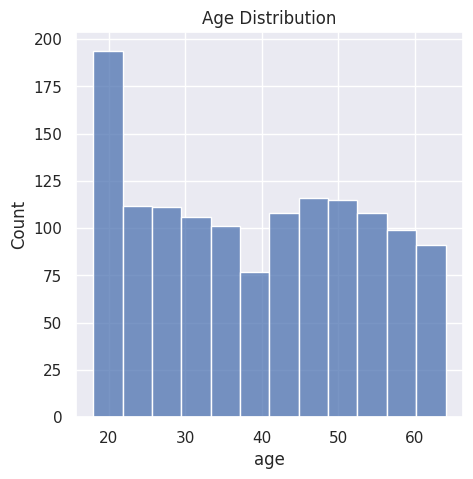

In [87]:
sns.set()
plt.figure(figsize=(5,5))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

linear,logistic.svm,deciscion tree,naive bayes

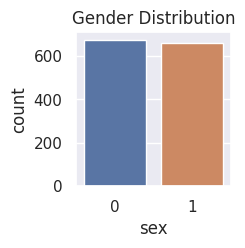

In [88]:
# Gender column
plt.figure(figsize=(2,2))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

In [15]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

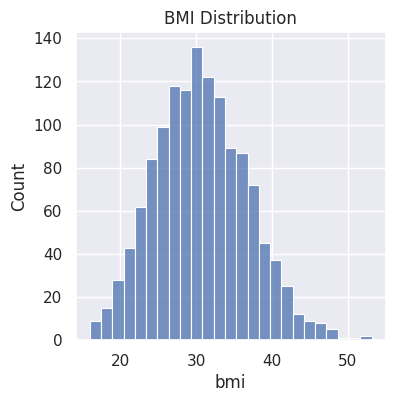

In [89]:
plt.figure(figsize=(4,4))
sns.histplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

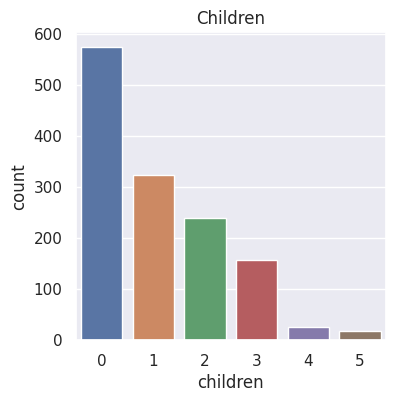

In [18]:
# children column
plt.figure(figsize=(4,4))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [21]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

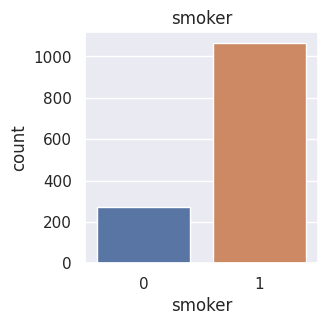

In [90]:
# smoker column
plt.figure(figsize=(3,3))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [24]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

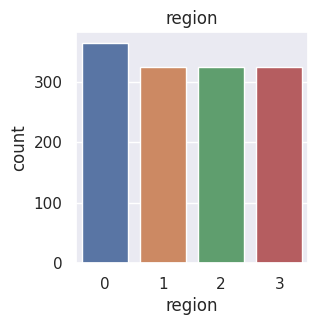

In [91]:
plt.figure(figsize=(3,3))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [26]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

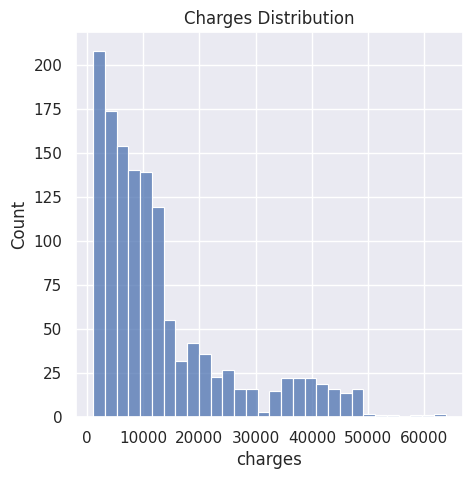

In [92]:
# distribution of charges value
plt.figure(figsize=(5,5))
sns.histplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

<ipython-input-32-dfbae183a815>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


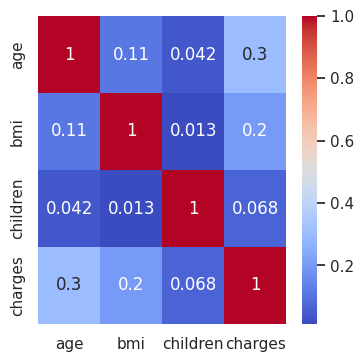

In [32]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

Data preprocessing


encoding categorial features

Splitting feature and target

In [34]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [35]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [36]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [37]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2)

Splitting the data into Training data & Testing Data

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train, Y_train)
lr.score(X_train,Y_train)

0.751505643411174

In [44]:
lr_Y_pred = lr.predict(X_test)

Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg


PolynomialFeatures()

In [58]:
#transforming the features to higher degree
X_train_poly = poly_reg.fit_transform(X_train)
#splitting the data
plr_X_train, plr_X_test, plr_Y_train, plr_Y_test = train_test_split(X_train_poly, Y_train, test_size=0.3, random_state=2)


In [59]:
plr = LinearRegression()
#model training
plr.fit(plr_X_train,plr_Y_train)
#model accuracy
plr.score(plr_X_train,plr_Y_train)

0.5585585007530586

In [60]:
plr_Y_pred = plr.predict(plr_X_test)

Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree


DecisionTreeRegressor()

In [64]:
#model training
dtree.fit(X_train,Y_train)
#model accuracy
dtree.score(X_train,Y_train)

1.0

In [65]:
dtree_pred = dtree.predict(X_test)

Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf

RandomForestRegressor()

In [67]:
#model training
rf.fit(X_train,Y_train)
#model accuracy
rf.score(X_train,Y_train)

0.9774069785753756

In [68]:
rf_pred = rf.predict(X_test)

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics

Model Evaluation

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [108]:
#evaluation Metrics
# Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(Y_test, lr_Y_pred)
mae_polynomial = mean_absolute_error(plr_Y_test, plr_Y_pred)
mae_tree = mean_absolute_error(Y_test, dtree_pred)
mae_rf  = mean_absolute_error(Y_test, rf_pred)

# Root Mean Squared Error (RMSE)
rms_linear = mean_squared_error(Y_test, lr_Y_pred, squared=False)
rms_polynomial = mean_squared_error(plr_Y_test, plr_Y_pred, squared=False)
rms_tree = mean_squared_error(Y_test, dtree_pred, squared=False)
rms_rf  = mean_squared_error(Y_test, rf_pred, squared=False)

# R-squared (R2)

r2_linear = r2_score(Y_test, lr_Y_pred)

r2_polynomial = r2_score(plr_Y_test, plr_Y_pred)

r2_tree = r2_score(Y_test, dtree_pred)

r2_rf  = r2_score(Y_test, rf_pred)

# Mean square error
mse_linear = mean_squared_error(Y_test, lr_Y_pred)
mse_polynomial = mean_squared_error(plr_Y_test, plr_Y_pred)
mse_tree =  mean_squared_error(Y_test, dtree_pred)
mse_rf  = mean_squared_error(Y_test, rf_pred)

In [109]:
# Print or use the metrics as needed
print("Mean Absolute Error:")
print(f"Linear Regression:", {mae_linear})
print(f"Logistic Regression:", {mae_polynomial})
print(f"Decision Tree:", {mae_tree})
print(f"Random Forest Tree:", {mae_rf})

print("\nRoot Mean Squared Error:")
print(f"Linear Regression:, {rms_linear}")
print(f"Logistic Regression:", {rms_polynomial})
print(f"Decision Tree:, {rms_tree}")
print(f"Random Forest Tree:", {rms_rf})

print("\nR-squared (R2):")
print(f"Linear Regression:, {r2_linear}")
print(f"Logistic Regression:", {r2_polynomial})
print(f"Decision Tree:, {r2_tree}")
print(f"Random Forest Tree:", {r2_rf})

print("\n Mean square error:")
print(f"Linear Regression:, {mse_linear}")
print(f"Logistic Regression:", {mse_polynomial})
print(f"Decision Tree:, {mse_tree}")
print(f"Random Forest Tree:", {mse_rf})


Mean Absolute Error:
Linear Regression: {4267.213826730733}
Logistic Regression: {6885.1776906026735}
Decision Tree: {3222.5978827537315}
Random Forest Tree: {2692.973286945896}

Root Mean Squared Error:
Linear Regression:, 6191.690842285236
Logistic Regression: {10709.544809607316}
Decision Tree:, 6586.8689326809545
Random Forest Tree: {4903.6347863719275}

R-squared (R2):
Linear Regression:, 0.7447273869684076
Logistic Regression: {0.3120545406845663}
Decision Tree:, 0.7111025285640753
Random Forest Tree: {0.8398887192124025}

 Mean square error:
Linear Regression:, 38337035.48643885
Logistic Regression: {114694350.02898699}
Decision Tree:, 43386842.33631754
Random Forest Tree: {24045634.118116856}


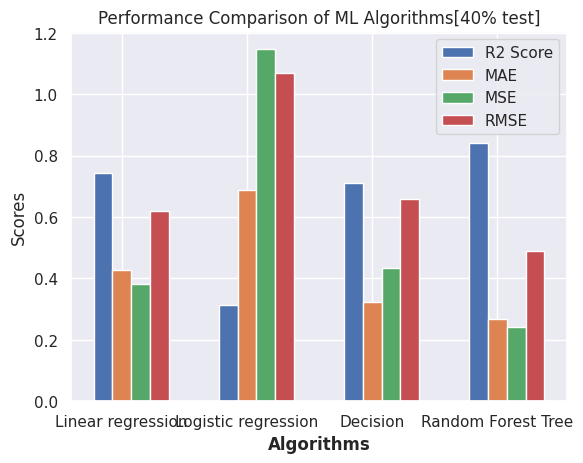

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have performance metrics for each algorithm[40%test]
r2_scores = [r2_linear, r2_polynomial, r2_tree, r2_rf]  # Replace with your R2 scores
mae_scores = [mae_linear/10000, mae_polynomial/10000,mae_tree/10000,mae_rf/10000]  # Replace with your MAE scores
mse_scores = [mse_linear/100000000,mse_polynomial/100000000,mse_tree/100000000 ,mse_rf/100000000]  # Replace with your MSE scores
rmse_scores = [rms_linear/10000, rms_polynomial/10000,rms_tree/10000, rms_rf/10000]  # Replace with your RMSE scores

# List of algorithms
algorithms = ['Linear regression', 'Logistic regression', 'Decision', 'Random Forest Tree']

# Set the width of the bars
bar_width = 0.15

# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Create bar plot

plt.bar(r2, r2_scores, width=bar_width, label='R2 Score')
plt.bar(r3, mae_scores, width=bar_width, label='MAE')
plt.bar(r4, mse_scores, width=bar_width, label='MSE')
plt.bar(r5, rmse_scores, width=bar_width, label='RMSE')

# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
plt.title('Performance Comparison of ML Algorithms[40% test]')

# Show legend
plt.legend()

# Show the plot
plt.show()

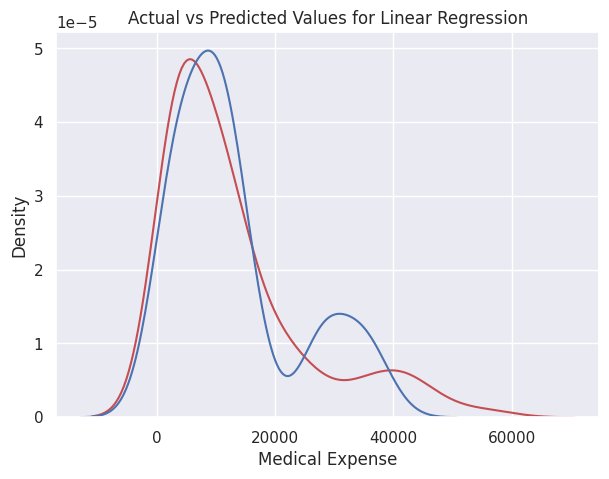

In [70]:
plt.figure(figsize=(7,5))
ax1 = sns.kdeplot(Y_test,color='r',label='Actual Value')
sns.kdeplot(lr_Y_pred,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

In [71]:
print('MAE:', mean_absolute_error(Y_test, lr_Y_pred))
print('MSE:', mean_squared_error(Y_test, lr_Y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, lr_Y_pred)))
print('R2 Score:', r2_score(Y_test, lr_Y_pred))


MAE: 4267.213826730733
MSE: 38337035.48643885
RMSE: 6191.690842285236
R2 Score: 0.7447273869684076


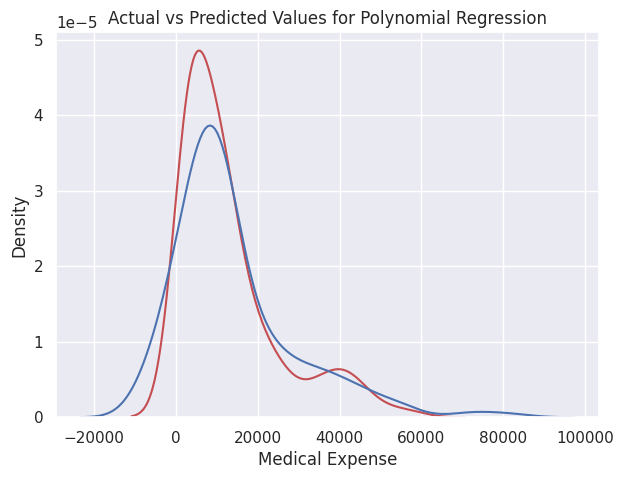

In [72]:
plt.figure(figsize=(7,5))
ax1 = sns.kdeplot(Y_test,color='r',label='Actual Value')
sns.kdeplot(plr_Y_pred,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.show()

In [74]:
print('MAE:', mean_absolute_error(plr_Y_test, plr_Y_pred))
print('MSE:', mean_squared_error(plr_Y_test, plr_Y_pred))
print('RMSE:', np.sqrt(mean_squared_error(plr_Y_test, plr_Y_pred)))
print('R2 Score:', r2_score(plr_Y_test, plr_Y_pred))

MAE: 6885.1776906026735
MSE: 114694350.02898699
RMSE: 10709.544809607316
R2 Score: 0.3120545406845663


Decision Tree

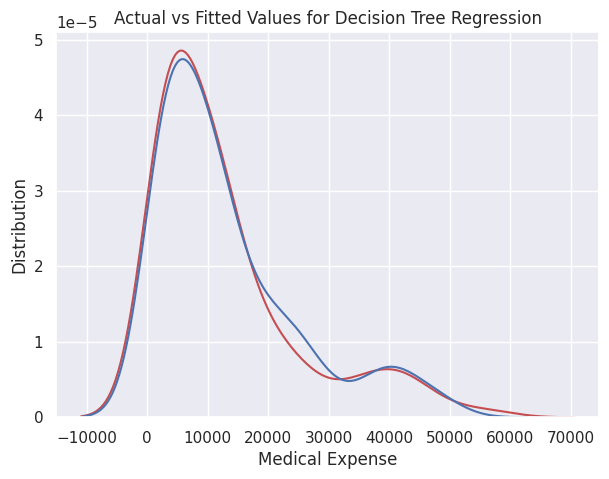

In [77]:
plt.figure(figsize=(7,5))
ax = sns.kdeplot(Y_test, color="r", label="Actual Value")
sns.kdeplot(dtree_pred, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [78]:
print('MAE:', mean_absolute_error(Y_test, dtree_pred))
print('MSE:', mean_squared_error(Y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, dtree_pred)))
print('Accuracy:', dtree.score(X_test,Y_test))

MAE: 3222.5978827537315
MSE: 43386842.33631754
RMSE: 6586.8689326809545
Accuracy: 0.7111025285640753


Random Forest Regressor

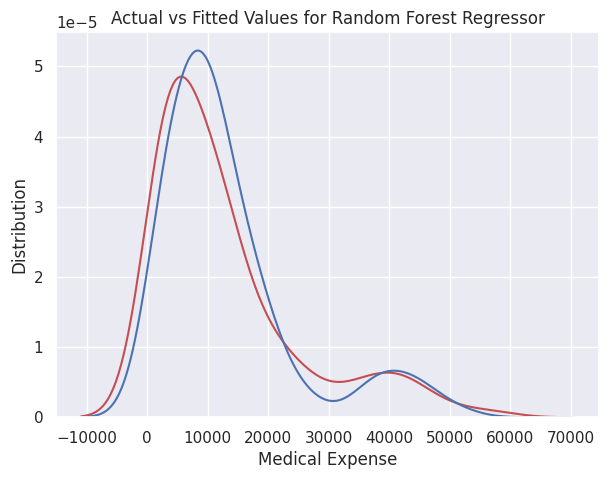

In [79]:
plt.figure(figsize=(7,5))
ax = sns.kdeplot(Y_test, color="r", label="Actual Value")
sns.kdeplot(rf_pred, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [81]:
print('MAE:', mean_absolute_error(Y_test, rf_pred))
print('MSE:', mean_squared_error(Y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, rf_pred)))
print('Accuracy:', rf.score(X_test,Y_test))

MAE: 2692.973286945896
MSE: 24045634.118116856
RMSE: 4903.6347863719275
Accuracy: 0.8398887192124025


In [75]:
# prediction on training data
training_data_prediction =lr.predict(X_train)

In [76]:
from sklearn import metrics

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7415730843556845


In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7661186068101191


Building a Predictive System

In [ ]:
import numpy as np

In [ ]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3885.63835645]
The insurance cost is USD  3885.6383564502376


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

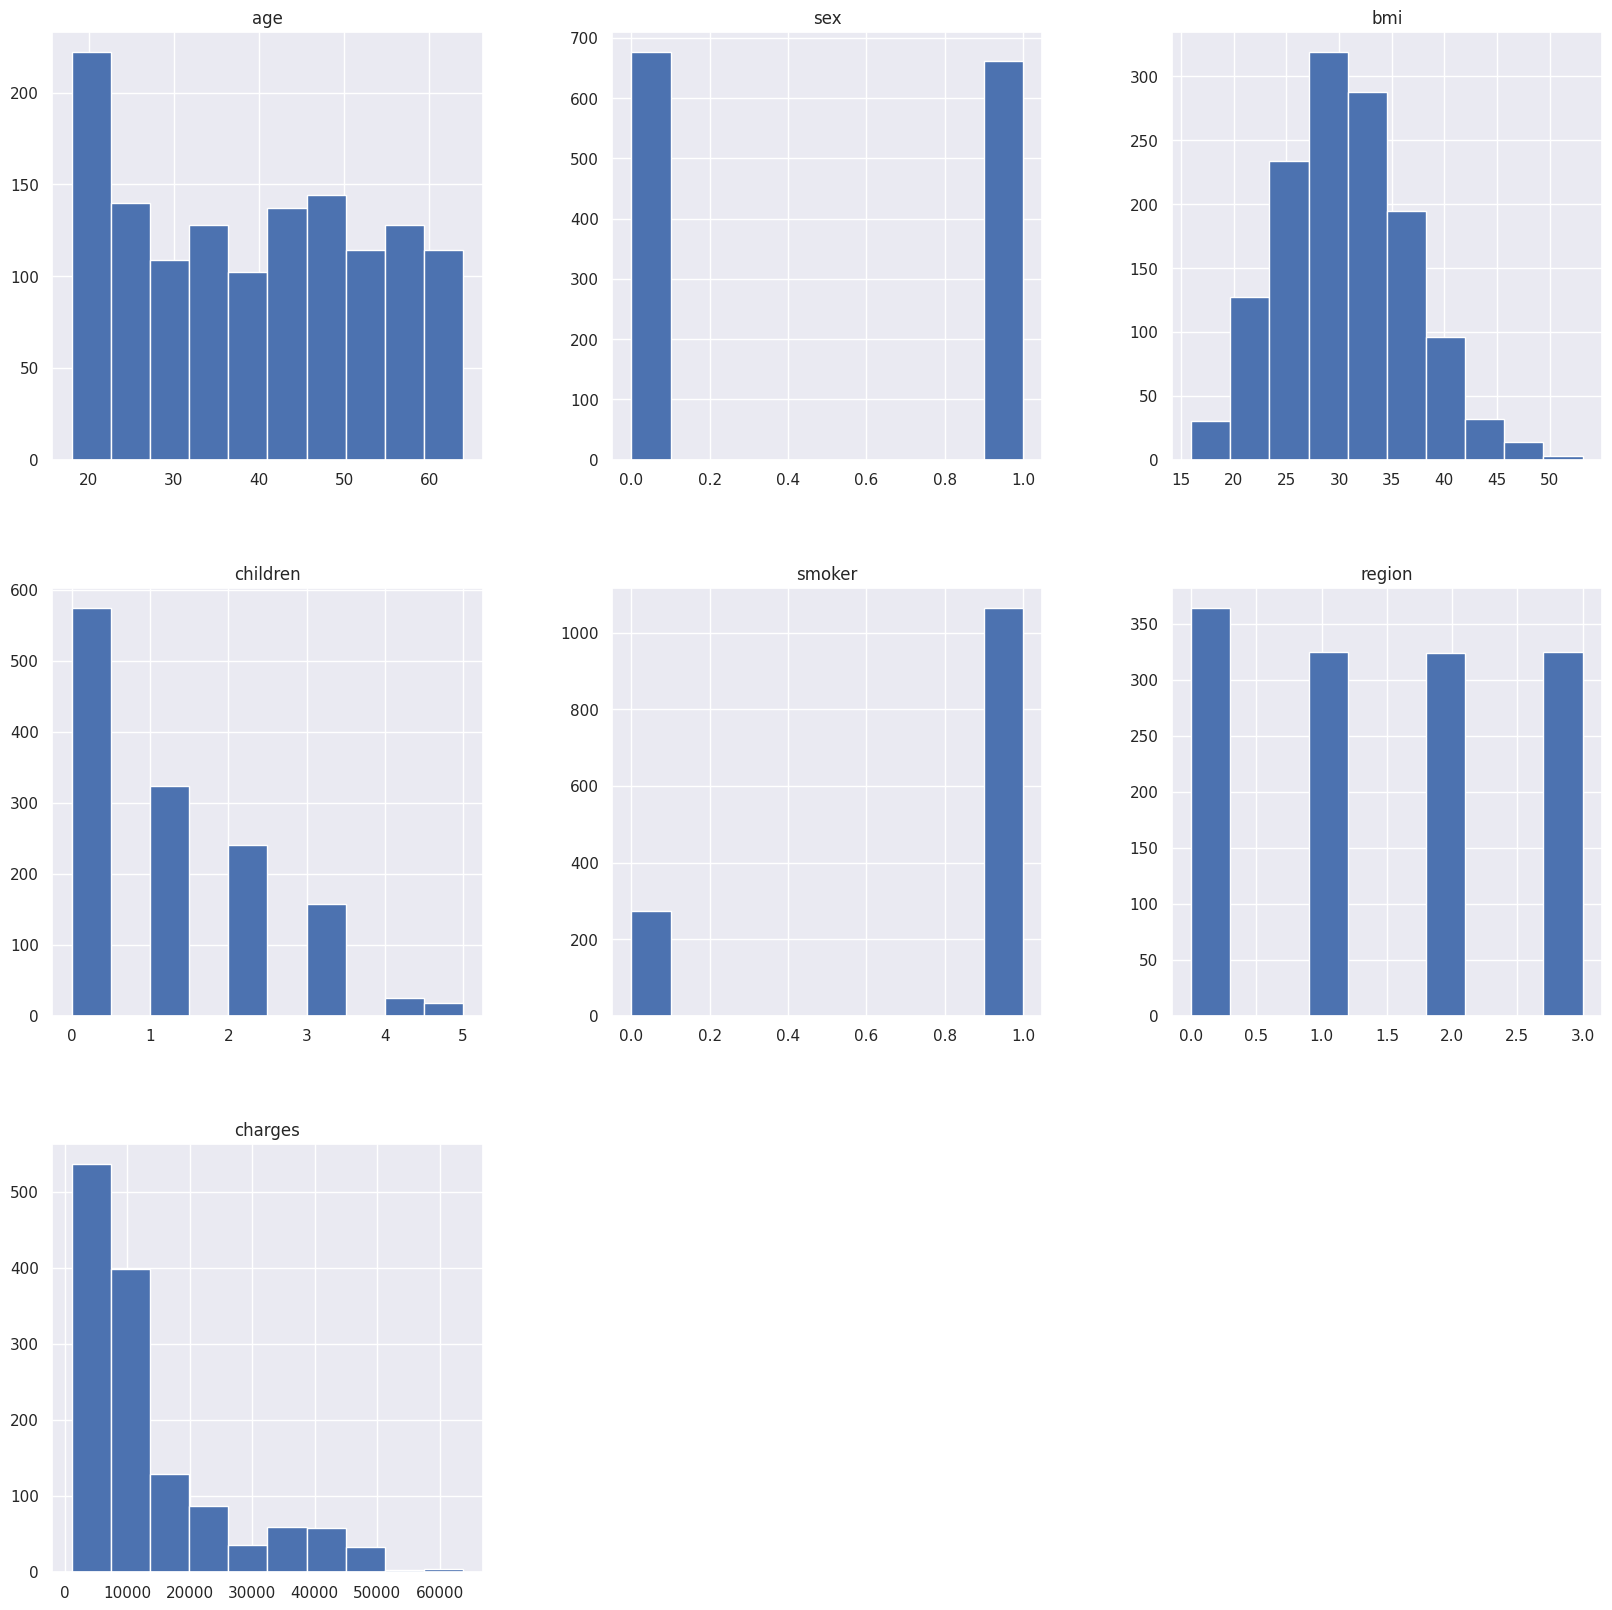

In [ ]:
df.hist(bins=10,figsize=(20,20))